In [35]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from pyecharts import Geo # 地理图

In [36]:
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False   # 用来正常显示负号
#配置风格
plt.rcParams["axes.labelsize"] = 16.
plt.rcParams["xtick.labelsize"] = 14.
plt.rcParams["ytick.labelsize"] = 14.
plt.rcParams["legend.fontsize"] = 12.
plt.rcParams["figure.figsize"] = [15.,15.]


In [37]:
data = pd.read_csv('E:\jupyter-notebook\data\LaGou.csv',encoding='gbk')
data.head(5)

,岗位名,学历,工资,工作年限,公司福利,是否全职,公司全称,公司名字,公司代号,上市公司,公司城市,公司小区,岗位类型,公司人数
0,Python开发工程师,本科,8k-16k,1-3年,包三餐，年终奖，福利优厚,全职,北京汇行科技有限公司,妙计旅行,493225,B轮,北京,东城区,后端开发,150-500人
1,Python工程师,本科,20k-40k,1-3年,"技术驱动,极客氛围,大牛团队",全职,北京旷视科技有限公司,Face++,3093928,C轮,北京,海淀区,后端开发,500-2000人
2,Python开发工程师,本科,6k-8k,1-3年,"帅哥美女多,福利房,过节福利,环境好",全职,中至数据集团股份有限公司,中至科技,3718199,未融资,南昌,新建区,后端开发,150-500人
3,Python开发工程师,本科,10k-20k,1-3年,"AI,扁平化,弹性工作制,交通方便",全职,上海懿天网络科技有限公司,Versa,3545348,A轮,上海,长宁区,后端开发,15-50人
4,Python开发工程师,本科,6k-10k,1-3年,"周末双休,五险一金,带薪年假,福利多多",全职,重庆易宠科技有限公司,重庆易宠科技有限公司,4051476,B轮,重庆,渝北区,后端开发,150-500人


In [38]:
data.tail()

,岗位名,学历,工资,工作年限,公司福利,是否全职,公司全称,公司名字,公司代号,上市公司,公司城市,公司小区,岗位类型,公司人数
445,高级python工程师,本科,15k-30k,3-5年,"年终奖丰厚,晋升畅通,五险一金,补贴多多",全职,杭州览众数据科技有限公司,览众数据,3728155,A轮,杭州,滨江区,后端开发,50-150人
446,Mano/虚拟化/openstack/python,本科,10k-20k,1-3年,"虚拟化,云,VMS,shell",全职,瞬联软件科技（北京）有限公司,瞬联软件科技（北京）有限公司,3862748,不需要融资,上海,长宁区,前端开发/移动开发,500-2000人
447,Python,不限,15k-30k,1-3年,"年假15天,免费早午餐,技术氛围好,弹性不打卡",全职,光合新知（北京）科技有限公司,洋葱数学,3856780,B轮,北京,朝阳区,后端开发,150-500人
448,Python高级开发工程师,本科,25k-35k,5-10年,"发展空间大,薪酬体系佳",全职,北京墨迹风云科技股份有限公司,墨迹天气,3101993,C轮,北京,朝阳区,后端开发,150-500人
449,Python中级研发工程师,本科,14k-23k,3-5年,福利好，前景好。平台好。,全职,北京中铁信科技有限公司,北京中铁信,3434658,不需要融资,北京,海淀区,后端开发,50-150人


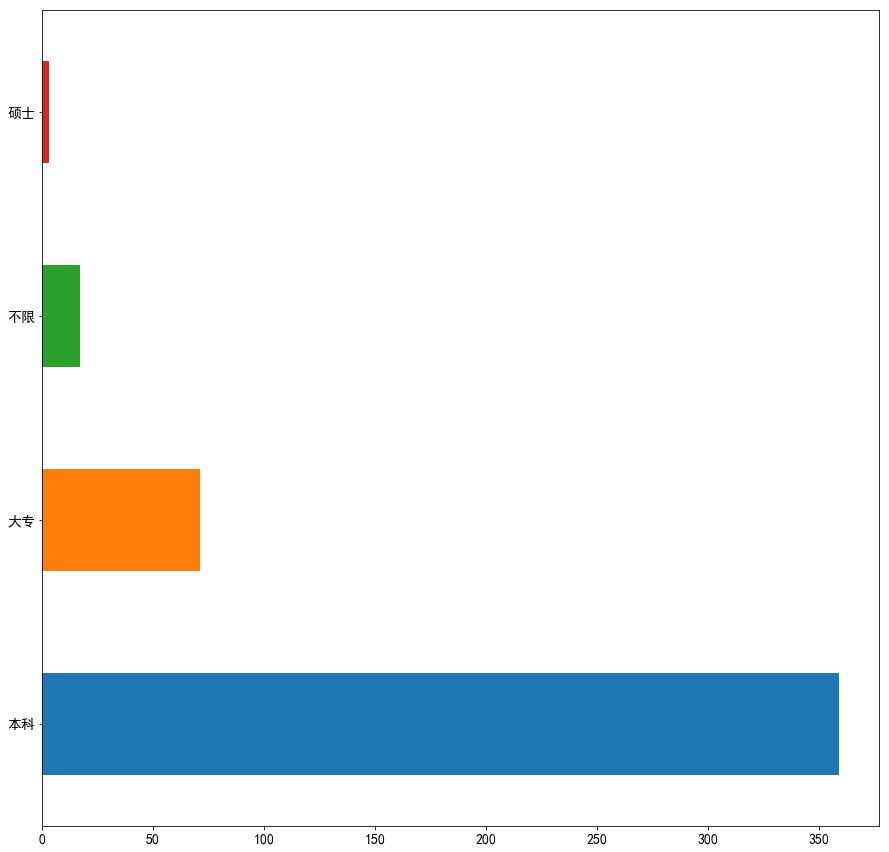

In [39]:
data['学历'].value_counts().plot(kind='barh',rot=0) # value_counts() 数据统计
plt.show()

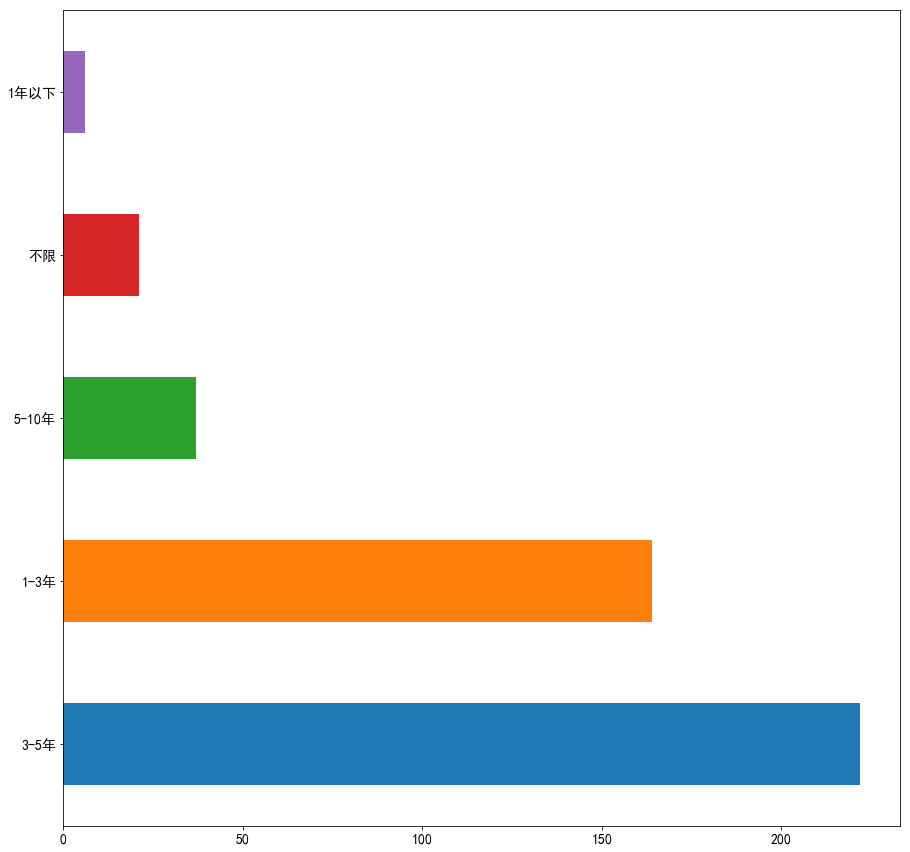

In [40]:
data['工作年限'].value_counts().plot(kind='barh',rot=0)
plt.show()

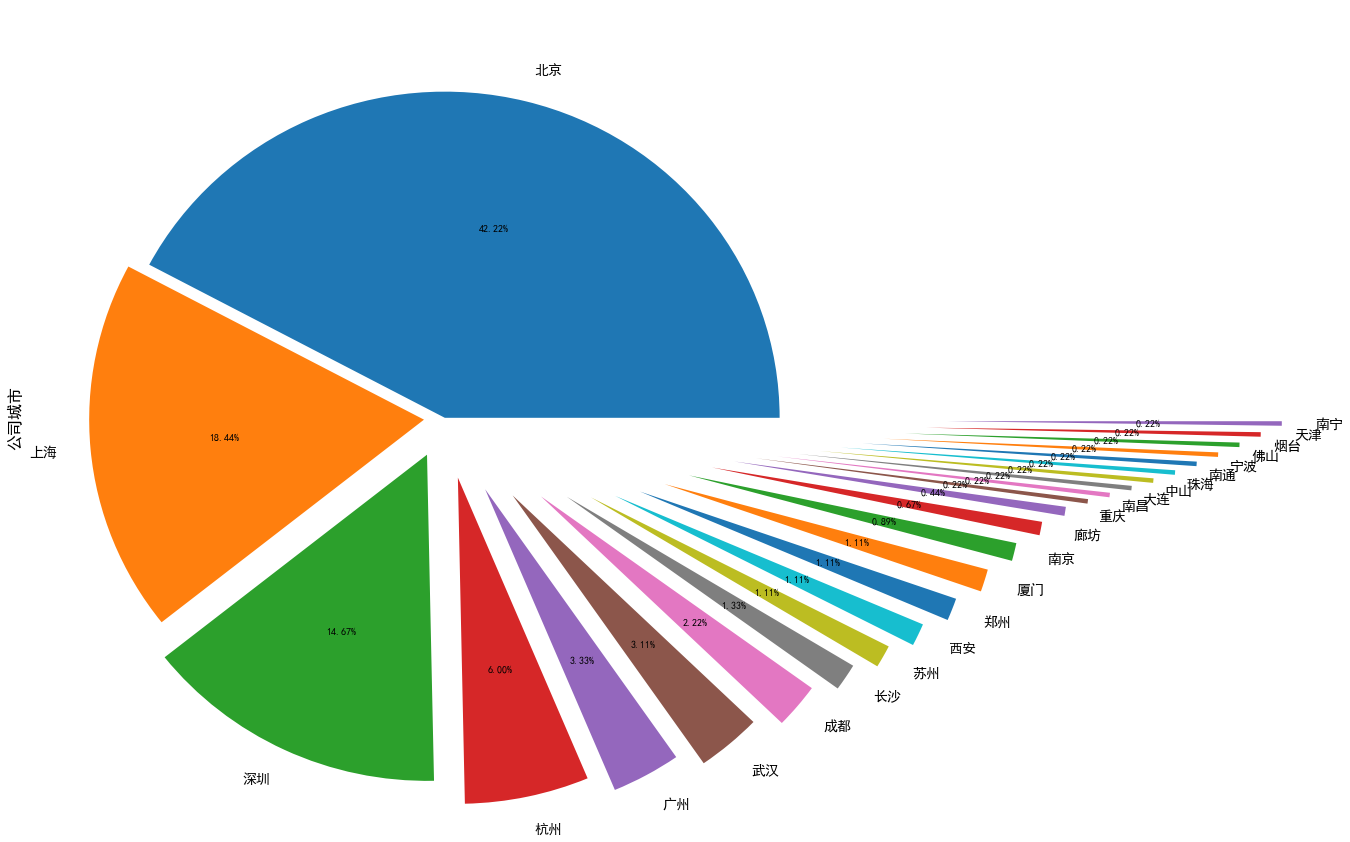

In [41]:
data['公司城市'].value_counts().plot(kind='pie',autopct='%1.2f%%',explode = np.linspace(0,1.5,25))
plt.show()

In [42]:
#提取数据框
data2 = list(map(lambda x:(data['公司城市'][x],eval(re.split('k|K',data['工资'][x])[0])*1000),range(len(data))))

In [43]:
#提取价格信息
data3 = pd.DataFrame(data2)
data3

,0,1
0,北京,8000
1,北京,20000
2,南昌,6000
3,上海,10000
4,重庆,6000
5,大连,5000
6,武汉,8000
7,西安,15000
8,杭州,15000
9,北京,20000


In [48]:
data4 = list(map(lambda x:(data3.groupby(0).mean()[1].index[x],data3.groupby(0).mean()[1].values[x]),range(len(data3.groupby(0)))))  

In [49]:
# 地理位置展示
geo = Geo("全国Python工资布局","制作人:王伟",title_color="#fff",title_pos="left",width=1200,height=600,background_color='#404a59') # 主标题，副标题，颜色白色，长宽，背景黑色
attr, value = geo.cast(data4)   # attr, value 映射关系（ attr：属性, value：值），把 data4 映射到 这个地理图上data4
geo.add("", attr, value, type="heatmap", is_visualmap=True, visual_range=[0, 30], visual_text_color='#fff') # attr, value 把这两个数据添加到geo。type：热力图。is_visualmap：是否可视化。visual_range右下角是否展示，展示的范围 0-300,（0-300是把工资转换成的区间）。visual_text_color文本颜色

In [50]:
geo